<a href="https://colab.research.google.com/github/scriptbuzz/titanic_ml_multimodel/blob/main/titanic_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction

It seems that deploying an ML pipeline for the Titanic dataset is a right of passage into classic machine learning. So I decided to publish yet another notebook on the subject. 

In this notebook, we will walk through the process of building a machine learning model to predict the survival of passengers on the Titanic. This is a well-known dataset and problem in the data science community, making it an excellent starting point for learning and practicing machine learning concepts.

The main steps we will follow are:

1. **Data ingestion**: Load the Titanic dataset (train.csv and test.csv) and explore its structure and features.

2. **Data preprocessing**: Perform data cleaning, feature engineering, and data transformation to prepare the dataset for machine learning algorithms.

3. **Exploratory Data Analysis (EDA)**: Visualize the data to gain insights, identify patterns, and understand relationships between different features and the target variable (Survival).

4. **Model selection and training**: Experiment with multiple machine learning models, such as Logistic Regression, Support Vector Machines, Random Forest, and K-Nearest Neighbors, to find the best-performing model for the dataset.

5. **Model evaluation**: Compare the performance of different models using accuracy scores and other performance metrics.

By the end of this notebook, you will have a better understanding of the machine learning pipeline, from data ingestion to model evaluation and deployment, and you will be able to apply these concepts to other datasets and problems.


In [1]:
# numpy: NumPy (Numerical Python) is a library for numerical computing in Python.
# It provides support for large, multi-dimensional arrays and matrices,
# along with a collection of mathematical functions to operate on these arrays.
import numpy as np

# pandas: A library that provides data structures (Series and DataFrame) and
# data manipulation tools for handling structured data in Python.
import pandas as pd

# matplotlib.pyplot: A plotting library for creating static, interactive, and animated
# visualizations in Python. It provides a MATLAB-like interface for creating various types of plots.
import matplotlib.pyplot as plt

# seaborn: A statistical data visualization library based on Matplotlib.
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# train_test_split: A function from the scikit-learn library that allows
# splitting datasets into training and testing subsets for model validation.
from sklearn.model_selection import train_test_split

# StandardScaler: A preprocessing module from the scikit-learn library that
# standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

# LogisticRegression: A linear model from the scikit-learn library for
# solving classification problems using logistic regression.
from sklearn.linear_model import LogisticRegression

# accuracy_score: A function from the scikit-learn library that computes
# the accuracy classification score between true and predicted labels.
# confusion_matrix: A function from the scikit-learn library that computes
# the confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
import pandas as pd
url_test_data = "https://raw.githubusercontent.com/scriptbuzz/datasets/main/titanic_test.csv"
url_train_data = "https://raw.githubusercontent.com/scriptbuzz/datasets/main/titanic_train.csv"
test_data = pd.read_csv(url_test_data)
train_data = pd.read_csv(url_train_data)


In [3]:
# Data Analysis

# Generate summary statistics to understand numerical features.
# This helps us get an overview of the central tendency and dispersion of the numerical features.
print(train_data.describe())

# Check the number of missing values in each column.
# Identifying missing values helps us decide how to handle them during preprocessing.
print(train_data.isnull().sum())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex  

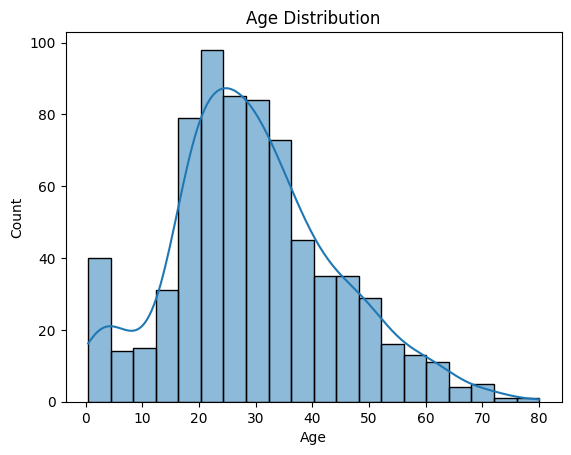

In [4]:
# Plot the distribution of the 'Age' column, excluding missing values.
# This helps us understand the distribution of ages and identify potential outliers.
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

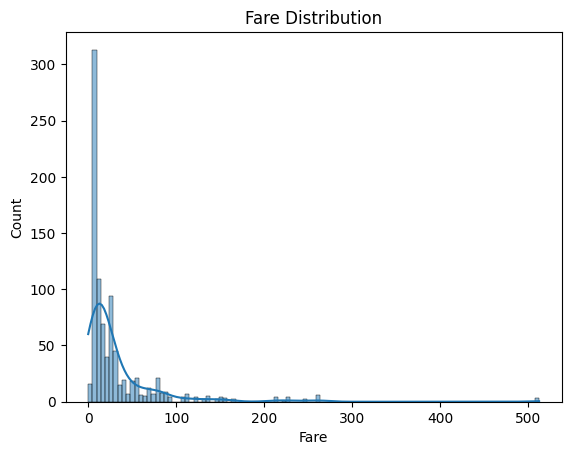

In [5]:
# Plot the distribution of the 'Fare' column.
# This helps us understand the distribution of fares and identify potential outliers.
sns.histplot(train_data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

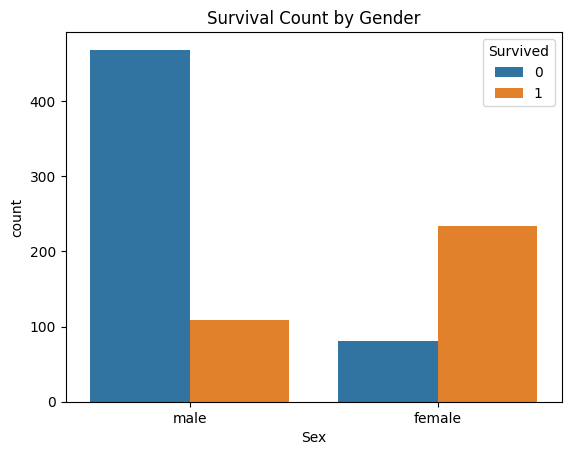

In [6]:
# Plot the count of survivors based on gender.
# This helps us understand the relationship between gender and survival rate.
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('Survival Count by Gender')
plt.show()

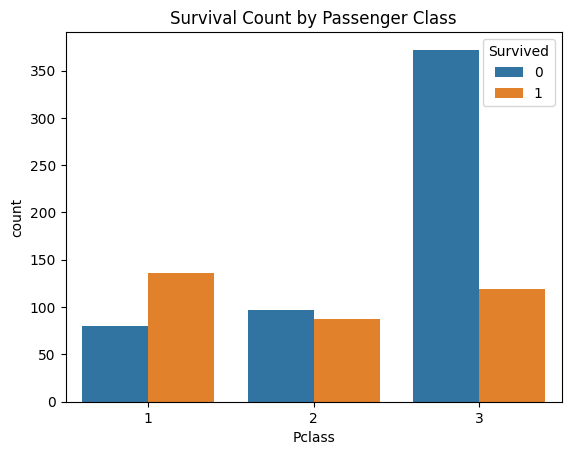

In [7]:
# Plot the count of survivors based on passenger class.
# This helps us understand the relationship between passenger class and survival rate.
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.title('Survival Count by Passenger Class')
plt.show()

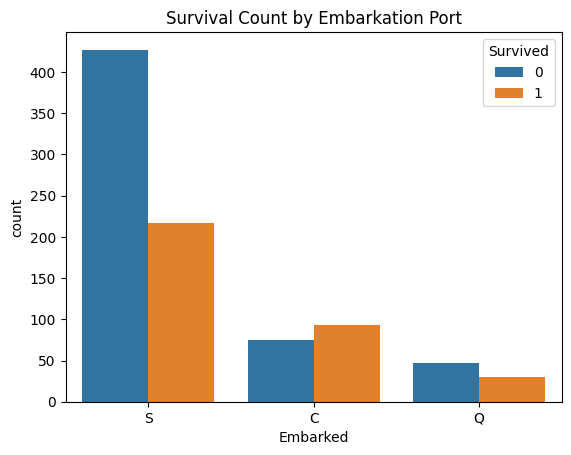

In [8]:
# Plot the count of survivors based on the 'Embarked' column.
# This helps us understand the relationship between the port of embarkation and survival rate.
sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.title('Survival Count by Embarkation Port')
plt.show()

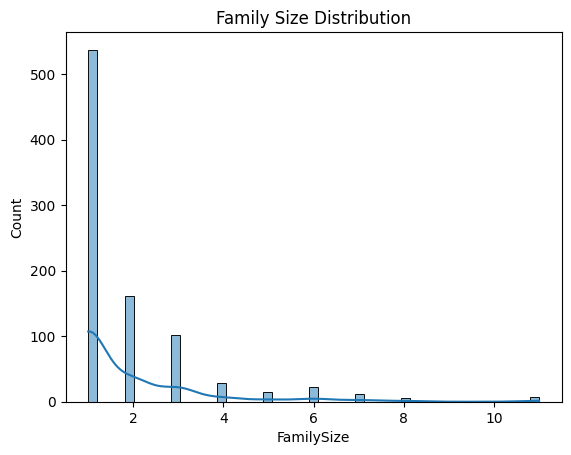

In [9]:
# Data Preprocessing

# Fill missing age values with the median age.
# We use the median to reduce the influence of outliers and provide a more representative value.
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

# Fill missing embarked values with the most frequent category.
# We use the mode since 'Embarked' is a categorical feature, and the mode represents the most common category.
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Fill missing fare values in the test dataset with the median fare.
# We use the median to reduce the influence of outliers and provide a more representative value.
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Convert categorical features ('Sex', 'Embarked') to binary columns using one-hot encoding.
# This step is necessary to convert non-numeric categorical data into a format that can be used by the model.
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Create a new feature 'FamilySize' by adding 'SibSp' and 'Parch' columns and a constant 1.
# This feature engineering step combines two related features into one, which might help the model make better predictions.
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# Visualize the distribution of the 'FamilySize' column.
# This helps us understand the distribution of family sizes and identify potential outliers.
sns.histplot(train_data['FamilySize'], kde=True)
plt.title('Family Size Distribution')
plt.show()

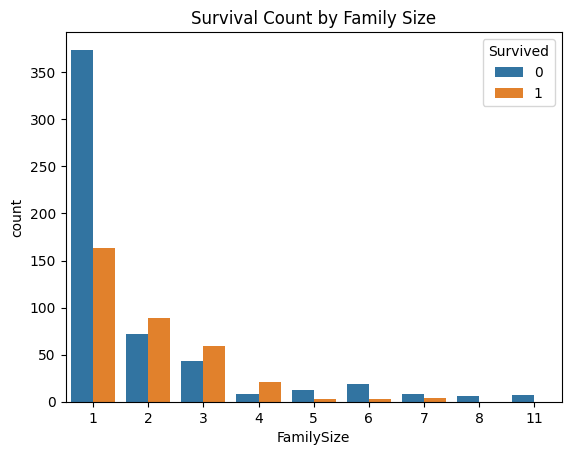

In [10]:
# Plot the count of survivors based on family size.
# This helps us understand the relationship between family size and survival rate.
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.title('Survival Count by Family Size')
plt.show()

In [11]:
# Prepare the input features (X) and the target variable (y) for the model.
# This step is necessary to separate the features and target variable for model training and evaluation.
X = train_data[['Pclass', 'Age', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'FamilySize']]
y = train_data['Survived']

# Split the dataset into a training set (80%) and a validation set (20%).
# This helps us evaluate the model's performance on unseen data to avoid overfitting.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the 'Age' and 'Fare' columns.
# Standardization helps ensure that features are on the same scale, which can improve the model's performance.
scaler = StandardScaler()
X_train[['Age', 'Fare']] = scaler.fit_transform(X_train[['Age', 'Fare']])
X_val[['Age', 'Fare']] = scaler.transform(X_val[['Age', 'Fare']])

In [12]:
# Instantiate a logistic regression model.
# We choose logistic regression as a simple and interpretable baseline model for binary classification.
model = LogisticRegression()

# Train the logistic regression model using the training data.
model.fit(X_train, y_train)

# Use the trained model to predict the target variable for both the training and validation sets.
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate the accuracy score for the training and validation sets.
# This helps us assess the model's performance and detect potential overfitting or underfitting.
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Print the accuracy scores for the training and validation sets.
print('Training Accuracy:', train_accuracy)
print('Validation Accuracy:', val_accuracy)



Training Accuracy: 0.8033707865168539
Validation Accuracy: 0.8044692737430168


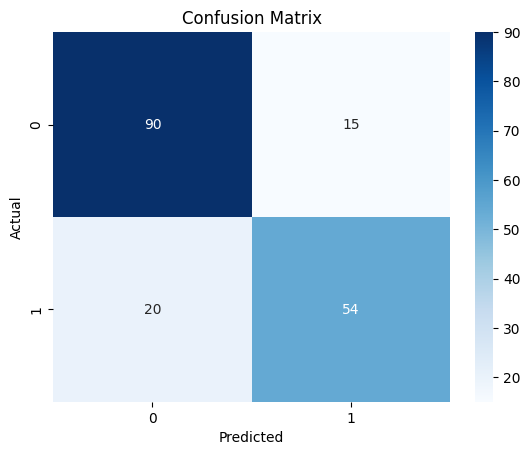

In [13]:
# Calculate the confusion matrix for the validation set.
# This helps us understand the types of errors the model is making (false positives and false negatives).
cm = confusion_matrix(y_val, y_val_pred)

# Visualize the confusion matrix using a heatmap.
# This provides a visual representation of the model's performance, making it easier to interpret.
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Logistic Regression - Training Accuracy: 0.8034, Validation Accuracy: 0.8045
SVM - Training Accuracy: 0.8343, Validation Accuracy: 0.8101
Random Forest - Training Accuracy: 0.9789, Validation Accuracy: 0.8268
KNN - Training Accuracy: 0.8553, Validation Accuracy: 0.8380


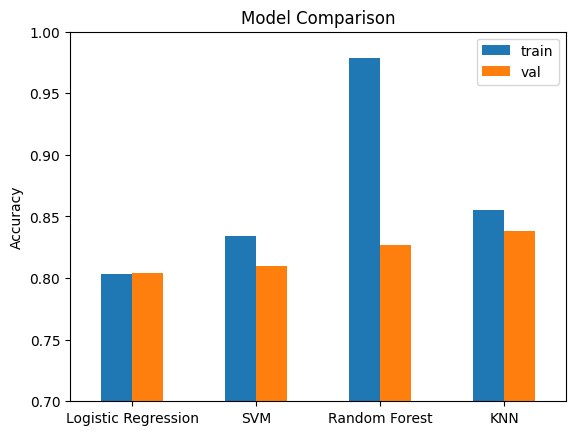

In [14]:
# Import additional models for comparison
# SVC: Support Vector Machines, a powerful algorithm that works well on a wide range of classification problems
# RandomForestClassifier: An ensemble learning method that constructs multiple decision trees at training time and outputs the class that is the mode of the classes of the individual trees
# KNeighborsClassifier: A simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Create a dictionary to store the models and their respective accuracy scores
model_scores = {'Logistic Regression': {'train': train_accuracy, 'val': val_accuracy}}

# Support Vector Machines (SVM)
# Train the SVM model, which can capture complex relationships in the data by using kernels
svm_model = SVC()
svm_model.fit(X_train, y_train)
model_scores['SVM'] = {
    'train': accuracy_score(y_train, svm_model.predict(X_train)),
    'val': accuracy_score(y_val, svm_model.predict(X_val))
}

# Random Forest
# Train the Random Forest model, which is an ensemble method that can reduce overfitting by averaging the results of multiple decision trees
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
model_scores['Random Forest'] = {
    'train': accuracy_score(y_train, rf_model.predict(X_train)),
    'val': accuracy_score(y_val, rf_model.predict(X_val))
}

# K-Nearest Neighbors (KNN)
# Train the KNN model, which is a simple algorithm that can work well when there is a clear decision boundary in the data
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
model_scores['KNN'] = {
    'train': accuracy_score(y_train, knn_model.predict(X_train)),
    'val': accuracy_score(y_val, knn_model.predict(X_val))
}

# Print the accuracy scores for each model
# This comparison helps us understand the performance of each model on the Titanic dataset and choose the best one
for model_name, scores in model_scores.items():
    print(f"{model_name} - Training Accuracy: {scores['train']:.4f}, Validation Accuracy: {scores['val']:.4f}")

# Compare the results using a bar plot
# This visualization makes it easier to compare the performance of different models
models_df = pd.DataFrame(model_scores).T
models_df.plot(kind='bar', ylim=(0.7, 1.0))
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()


Thank you and hope you found this code useful. 